In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
print('The types of fraudulent transactions are {}'.format(
    list(df.loc[df.isFraud == 1].type.drop_duplicates().values)))

The types of fraudulent transactions are ['TRANSFER', 'CASH_OUT']


# Encoding

In [4]:
# In variables nameOrig and nameDest only need code C (Customer) or M (Merchant)

df['nameOrig'] = df['nameOrig'].str[0]
df['nameDest'] = df['nameDest'].str[0]


pd.concat([df.head(), df.tail()])

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C,170136.00,160296.36,M,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C,21249.00,19384.72,M,0.00,0.00,0,0
2,1,TRANSFER,181.00,C,181.00,0.00,C,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C,181.00,0.00,C,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C,41554.00,29885.86,M,0.00,0.00,0,0
6362615,743,CASH_OUT,339682.13,C,339682.13,0.00,C,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C,6311409.28,0.00,C,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C,6311409.28,0.00,C,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C,850002.52,0.00,C,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C,850002.52,0.00,C,6510099.11,7360101.63,1,0


In [5]:
from sklearn.preprocessing import LabelEncoder

# transform nameOrig and nameDest 0 : C (customer) ,  1 : M (merchant)
# transfrom type to 0 : Cash In  ,  1 : Cash Out ,  2 : Debit ,  3 : Payment ,  4 : Transfer 

df['type'] = LabelEncoder().fit_transform(df['type'])
df['nameOrig'] = LabelEncoder().fit_transform(df['nameOrig'])
df['nameDest'] = LabelEncoder().fit_transform(df['nameDest'])
pd.concat([df.head(), df.tail()])

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,0,170136.00,160296.36,1,0.00,0.00,0,0
1,1,3,1864.28,0,21249.00,19384.72,1,0.00,0.00,0,0
2,1,4,181.00,0,181.00,0.00,0,0.00,0.00,1,0
3,1,1,181.00,0,181.00,0.00,0,21182.00,0.00,1,0
4,1,3,11668.14,0,41554.00,29885.86,1,0.00,0.00,0,0
6362615,743,1,339682.13,0,339682.13,0.00,0,0.00,339682.13,1,0
6362616,743,4,6311409.28,0,6311409.28,0.00,0,0.00,0.00,1,0
6362617,743,1,6311409.28,0,6311409.28,0.00,0,68488.84,6379898.11,1,0
6362618,743,4,850002.52,0,850002.52,0.00,0,0.00,0.00,1,0
6362619,743,1,850002.52,0,850002.52,0.00,0,6510099.11,7360101.63,1,0


In [6]:
# Total steps 744 (30 days), change hour for a month long to hour for a day
df['step'] = df['step'] % 24
pd.concat([df.head(), df.tail()])

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,0,170136.00,160296.36,1,0.00,0.00,0,0
1,1,3,1864.28,0,21249.00,19384.72,1,0.00,0.00,0,0
2,1,4,181.00,0,181.00,0.00,0,0.00,0.00,1,0
3,1,1,181.00,0,181.00,0.00,0,21182.00,0.00,1,0
4,1,3,11668.14,0,41554.00,29885.86,1,0.00,0.00,0,0
6362615,23,1,339682.13,0,339682.13,0.00,0,0.00,339682.13,1,0
6362616,23,4,6311409.28,0,6311409.28,0.00,0,0.00,0.00,1,0
6362617,23,1,6311409.28,0,6311409.28,0.00,0,68488.84,6379898.11,1,0
6362618,23,4,850002.52,0,850002.52,0.00,0,0.00,0.00,1,0
6362619,23,1,850002.52,0,850002.52,0.00,0,6510099.11,7360101.63,1,0


In [7]:
# Dropping isFlaggedFraud column

df.drop(['isFlaggedFraud'], axis = 1, inplace = True)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,0,170136.0,160296.36,1,0.0,0.0,0
1,1,3,1864.28,0,21249.0,19384.72,1,0.0,0.0,0
2,1,4,181.00,0,181.0,0.00,0,0.0,0.0,1
3,1,1,181.00,0,181.0,0.00,0,21182.0,0.0,1
4,1,3,11668.14,0,41554.0,29885.86,1,0.0,0.0,0


In [8]:
df.describe()

# nameOrig only has 0 which Customer, there is no M (merchant), so will drop the column

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6362620.0,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.532145e+01,1.714150e+00,1.798619e+05,0.0,8.338831e+05,8.551137e+05,3.381461e-01,1.100702e+06,1.224996e+06,1.290820e-03
std,4.321799e+00,1.350117e+00,6.038582e+05,0.0,2.888243e+06,2.924049e+06,4.730786e-01,3.399180e+06,3.674129e+06,3.590480e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.200000e+01,1.000000e+00,1.338957e+04,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.600000e+01,1.000000e+00,7.487194e+04,0.0,1.420800e+04,0.000000e+00,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,1.900000e+01,3.000000e+00,2.087215e+05,0.0,1.073152e+05,1.442584e+05,1.000000e+00,9.430367e+05,1.111909e+06,0.000000e+00
max,2.300000e+01,4.000000e+00,9.244552e+07,0.0,5.958504e+07,4.958504e+07,1.000000e+00,3.560159e+08,3.561793e+08,1.000000e+00


In [9]:
df.drop(['nameOrig'], axis = 1, inplace = True)
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,170136.0,160296.36,1,0.0,0.0,0
1,1,3,1864.28,21249.0,19384.72,1,0.0,0.0,0
2,1,4,181.00,181.0,0.00,0,0.0,0.0,1
3,1,1,181.00,181.0,0.00,0,21182.0,0.0,1
4,1,3,11668.14,41554.0,29885.86,1,0.0,0.0,0


The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


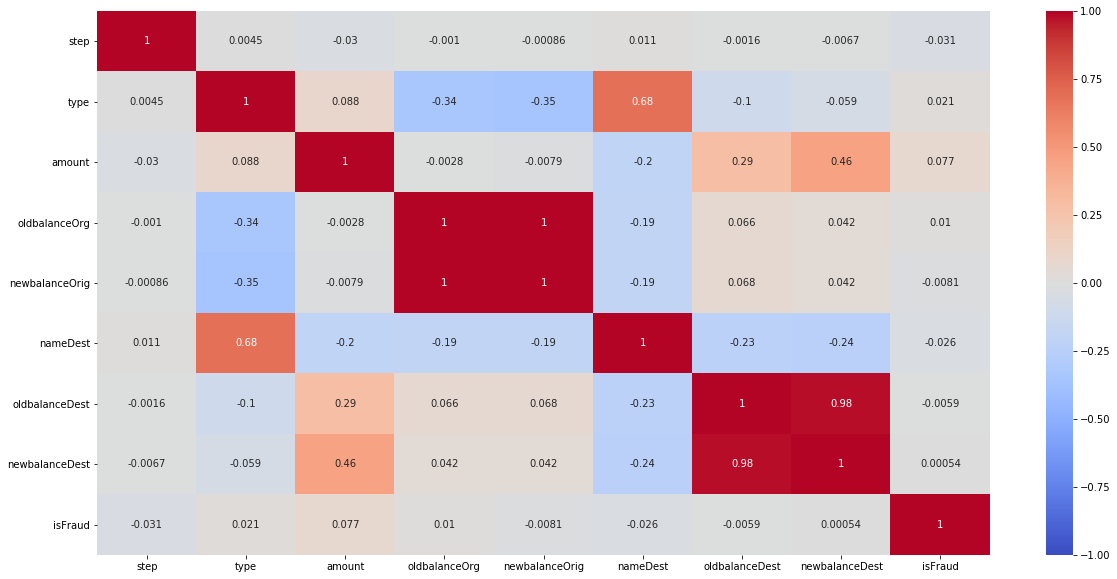

In [10]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.show()

In [11]:
df.corr()['isFraud'].sort_values(ascending = True)

step             -0.031403
nameDest         -0.025697
newbalanceOrig   -0.008148
oldbalanceDest   -0.005885
newbalanceDest    0.000535
oldbalanceOrg     0.010154
type              0.020833
amount            0.076688
isFraud           1.000000
Name: isFraud, dtype: float64

In [12]:
df.shape

(6362620, 9)

# Feature Selection

In [13]:
from sklearn.model_selection import train_test_split

X = df[['amount', 'type', 'step', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'oldbalanceOrg']]
y = df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2, stratify = y)

In [14]:
X_train.shape

(5090096, 7)

In [15]:
X_test.shape

(1272524, 7)

# Base Model

# Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

model_logReg = LogisticRegression()
model_logReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, recall_score, precision_score, accuracy_score

y_pred_logReg = model_logReg.predict(X_test)
print(classification_report(y_test, y_pred_logReg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.71      0.53      0.61      1643

    accuracy                           1.00   1272524
   macro avg       0.85      0.76      0.80   1272524
weighted avg       1.00      1.00      1.00   1272524



In [18]:
cm_logReg = confusion_matrix(y_test, y_pred_logReg, labels=[1 , 0])
df_logReg = pd.DataFrame(data=cm_logReg, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

In [19]:
pd.DataFrame(data=cm_logReg, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,871,772
Akt 0,355,1270526


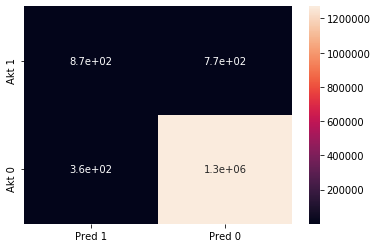

In [20]:
sns.heatmap(df_logReg, annot=True)
plt.show()

# Smote
**Since we have imbalance data, we will handling with smote**

### Random Under Sampling

In [ ]:
df_train = pd.concat([X_train, y_train], axis=1)

In [ ]:
df_train['isFraud'].value_counts()

In [ ]:
from sklearn.utils import resample

## Kelas Majority
non_fraud = df_train[df_train['isFraud'] == 0] 

## Kelas Minority
fraud = df_train[df_train['isFraud'] == 1]


## Kelas Majority akan di Undersampling
non_fraud_undersample = resample(non_fraud, ## Kelas Majority yg akan di undersampling
                                replace=False,
                                n_samples = len(fraud), ## Jumlah Kelas Minority
                                random_state = 42)

In [ ]:
df_UnderSample = pd.concat([non_fraud_undersample, fraud])
df_UnderSample['isFraud'].value_counts()

In [ ]:
X_train_UnderSample = df_UnderSample.drop(columns='isFraud')
y_train_UnderSample = df_UnderSample['isFraud']

# Logistic Regression Random Under Sampling

In [ ]:
from sklearn.linear_model import LogisticRegression

modelUnderSample = LogisticRegression()
modelUnderSample.fit(X_train_UnderSample, y_train_UnderSample)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, recall_score, precision_score, accuracy_score

y_pred_UnderSample = modelUnderSample.predict(X_test)
print(classification_report(y_test, y_pred_UnderSample))

In [ ]:
cm_UnderSample = confusion_matrix(y_test, y_pred_UnderSample, labels=[1 , 0])
df_UnderSample = pd.DataFrame(data=cm_UnderSample, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

In [ ]:
pd.DataFrame(data=cm_UnderSample, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

In [ ]:
sns.heatmap(df_UnderSample, annot=True)
plt.show()

### SMOTE - Synthetic Minority Oversampling Technique

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=42)
X_train.head()

In [ ]:
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)
df_train['isFraud'].value_counts()

In [ ]:
modelSMOTE = LogisticRegression()
modelSMOTE.fit(X_train_sm, y_train_sm)

In [ ]:
y_pred_sm = modelSMOTE.predict(X_test)
print(classification_report(y_test, y_pred_sm))

In [ ]:
cm_sm = confusion_matrix(y_test, y_pred_sm, labels=[1 , 0])
df_sm = pd.DataFrame(data=cm_sm, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
pd.DataFrame(data=cm_sm, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

In [ ]:
sns.heatmap(df_sm, annot=True)
plt.show()

### Class Weight LogReg

In [ ]:
model_CW = LogisticRegression(class_weight={0: .02, 1: .98})
model_CW.fit(X_train_sm, y_train_sm)

In [ ]:
y_pred_CW = model_CW.predict(X_test)
print(classification_report(y_test, y_pred_CW))

In [ ]:
confusion_matrix(y_test, y_pred_CW, labels=[1 , 0])

In [ ]:
model_CW.fit(X_train, y_train)

In [ ]:
y_pred_CW_2 = model_CW.predict(X_test)
print(classification_report(y_test, y_pred_CW_2))

In [ ]:
cm_CW = confusion_matrix(y_test, y_pred_CW_2, labels=[1 , 0])
df_CW = pd.DataFrame(data=cm_CW, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

In [ ]:
pd.DataFrame(data=cm_CW, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

In [ ]:
sns.heatmap(df_CW, annot=True)
plt.show()

# KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model_KNN = KNeighborsClassifier()

In [ ]:
model_KNN.fit(X_train_sm, y_train_sm)

In [ ]:
y_pred_KNN = model_KNN.predict(X_test)
print(classification_report(y_test, y_pred_KNN))

In [ ]:
cm_KNN = confusion_matrix(y_test, y_pred_KNN, labels = [1,0])
df_KNN = pd.DataFrame(data = cm_KNN, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
pd.DataFrame(data = cm_KNN, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])